<a href="https://colab.research.google.com/github/Koperek127/LeNetFashionMnistBinarized/blob/main/LeNetFashionMnistBinarized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install larq

from __future__ import absolute_import, division, print_function, unicode_literals
import larq as lq
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

     |████████████████████████████████| 71kB 7.6MB/s 
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=80ee221864bd93310e59ea66a6d285be05062be62ddb19ba1a31e6221c43f68b
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables
  Found existing installation: importlib-metadata 4.0.1
    Uninstalling importlib-metadata-4.0.1:
      Successfully uninstalled importlib-metadata-4.0.1


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between -1 and 1
train_images, test_images = train_images / 127.5 - 1, test_images / 127.5 - 1

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
kwargs = dict(input_quantizer="ste_sign",
              kernel_quantizer="ste_sign",
              kernel_constraint="weight_clip")


In [ ]:
modelLenet = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(modelLenet)
lq.models.summary(model)

+sequential stats---------------------------------------------------------------+
| Layer            Input prec.           Outputs  # 32-bit  Memory  32-bit MACs |
|                        (bit)                         x 1    (kB)              |
+-------------------------------------------------------------------------------+
| conv2d                     -   (-1, 28, 28, 6)       156    0.61       117600 |
| max_pooling2d              -   (-1, 14, 14, 6)         0       0            0 |
| conv2d_1                   -  (-1, 14, 14, 16)      2416    9.44       470400 |
| max_pooling2d_1            -    (-1, 7, 7, 16)         0       0            0 |
| flatten                    -         (-1, 784)         0       0            0 |
| dense                      -         (-1, 120)     94200  367.97        94080 |
| dense_1                    -          (-1, 84)     10164   39.70        10080 |
| dense_2                    -          (-1, 10)       850    3.32          840 |
+---------------

In [ ]:
modelLenet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

trained_Lmodel = modelLenet.fit(train_images, train_labels, batch_size=64, epochs=10)

test_lossL, test_accL = modelLenet.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 40s 42ms/step - loss: 0.7048 - accuracy: 0.7480
Epoch 2/10
938/938 [==============================] - 40s 42ms/step - loss: 0.3445 - accuracy: 0.8741
Epoch 3/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2952 - accuracy: 0.8916
Epoch 4/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2567 - accuracy: 0.9036
Epoch 5/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2342 - accuracy: 0.9123
Epoch 6/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2127 - accuracy: 0.9200
Epoch 7/10
938/938 [==============================] - 40s 42ms/step - loss: 0.1998 - accuracy: 0.9234
Epoch 8/10
938/938 [==============================] - 40s 42ms/step - loss: 0.1865 - accuracy: 0.9299
Epoch 9/10
938/938 [==============================] - 40s 42ms/step - loss: 0.1734 - accuracy: 0.9341
Epoch 10/10
313/313 [==============================] - 4s 11ms/step - loss: 0.2675

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model = model.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 41s 43ms/step - loss: 0.8843 - accuracy: 0.7813
Epoch 2/10
938/938 [==============================] - 40s 43ms/step - loss: 0.6208 - accuracy: 0.8837
Epoch 3/10
938/938 [==============================] - 40s 43ms/step - loss: 0.5763 - accuracy: 0.8998
Epoch 4/10
938/938 [==============================] - 40s 43ms/step - loss: 0.5572 - accuracy: 0.9076
Epoch 5/10
938/938 [==============================] - 40s 43ms/step - loss: 0.5411 - accuracy: 0.9150
Epoch 6/10
938/938 [==============================] - 40s 43ms/step - loss: 0.5298 - accuracy: 0.9185
Epoch 7/10
938/938 [==============================] - 40s 43ms/step - loss: 0.5128 - accuracy: 0.9269
Epoch 8/10
938/938 [==============================] - 40s 43ms/step - loss: 0.5074 - accuracy: 0.9299
Epoch 9/10
938/938 [==============================] - 40s 43ms/step - loss: 0.4988 - accuracy: 0.9303
Epoch 10/10
313/313 [==============================] - 4s 12ms/step - loss: 0.5504

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(20, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model2)

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model2 = model2.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

+sequential_2 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| conv2d_4                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_4                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_5                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_5                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_3                        -         (-1, 784)        0         0       0           0            0 |
| dense_5          

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(40, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model3)

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model3 = model3.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

+sequential_3 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| conv2d_6                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_6                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_7                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_7                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_5                        -         (-1, 784)        0         0       0           0            0 |
| dense_7          

In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(80, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model4)

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model4 = model4.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss4, test_acc4 = model4.evaluate(test_images, test_labels)

+sequential_4 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| conv2d_8                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_8                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_9                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_9                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_7                        -         (-1, 784)        0         0       0           0            0 |
| dense_9          

In [ ]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model5)

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model5 = model5.fit(train_images, train_labels, batch_size=16, epochs=10)

test_loss5, test_acc5 = model5.evaluate(test_images, test_labels)

+sequential_5 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| conv2d_10                        -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_10                 -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_11                        -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_11                 -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_9                        -         (-1, 784)        0         0       0           0            0 |
| dense_11         

In [ ]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model6)

model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model6 = model6.fit(train_images, train_labels, batch_size=8, epochs=10)

test_loss6, test_acc6 = model6.evaluate(test_images, test_labels)

+sequential_6 stats-----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_12                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_12                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_13                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_13                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_11                        -         (-1, 784)        0         0       0           0            0 |
| dense_13

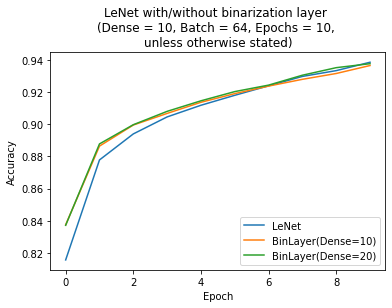

In [ ]:
# summarize history for accuracy
plt.plot(trained_Lmodel.history['accuracy'])
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model2.history['accuracy'])
plt.title('LeNet with/without binarization layer \n(Dense = 10, Batch = 64, Epochs = 10, \nunless otherwise stated)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LeNet',
            'BinLayer(Dense=10)', 
            'BinLayer(Dense=20)'], loc='lower right')
plt.show()

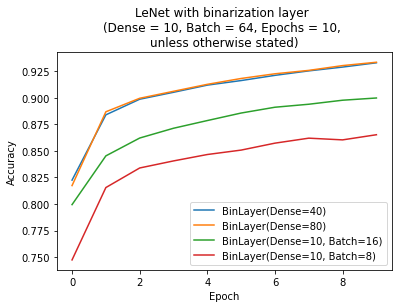

In [ ]:
# summarize history for accuracy
plt.plot(trained_model3.history['accuracy'])
plt.plot(trained_model4.history['accuracy'])
plt.plot(trained_model5.history['accuracy'])
plt.plot(trained_model6.history['accuracy'])
plt.title('LeNet with binarization layer \n(Dense = 10, Batch = 64, Epochs = 10, \nunless otherwise stated)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['BinLayer(Dense=40)',
            'BinLayer(Dense=80)',
            'BinLayer(Dense=10, Batch=16)',
            'BinLayer(Dense=10, Batch=8)'], loc='lower right')
plt.show()



---

**Binarization of 2 last layers:**

1. Layer size: 84, 10(last)

   batch size: 64

In [ ]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(84, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model7)

model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model7 = model7.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss7, test_acc7 = model7.evaluate(test_images, test_labels)

+sequential_7 stats-----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_14                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_14                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_15                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_15                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_13                        -         (-1, 784)        0         0       0           0            0 |
| dense_15

2. Layer size: 84, 40(last)

   batch size: 64

In [ ]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(84, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(40, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model8)

model8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model8 = model8.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss8, test_acc8 = model8.evaluate(test_images, test_labels)

+sequential_8 stats-----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_16                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_16                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_17                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_17                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_15                        -         (-1, 784)        0         0       0           0            0 |
| dense_16

3. Layer size: 84, 10(last)

   batch size: 16

In [ ]:
model9 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(84, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model9)

model9.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model9 = model9.fit(train_images, train_labels, batch_size=16, epochs=10)

test_loss9, test_acc9 = model9.evaluate(test_images, test_labels)

+sequential_9 stats-----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_18                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_18                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_19                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_19                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_17                        -         (-1, 784)        0         0       0           0            0 |
| dense_17

5. Layer size: 84, 10(last)

   batch size: 8

In [ ]:
model10 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(84, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model10)

model10.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model10 = model10.fit(train_images, train_labels, batch_size=8, epochs=10)

test_loss10, test_acc10 = model10.evaluate(test_images, test_labels)

+sequential_10 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_20                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_20                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_21                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_21                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_19                        -         (-1, 784)        0         0       0           0            0 |
| dense_18

6. Layer size: 40, 10(last)

   batch size: 64

In [ ]:
model11 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(40, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model10)

model11.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model11 = model11.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss11, test_acc11 = model11.evaluate(test_images, test_labels)

+sequential_10 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_20                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_20                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_21                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_21                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_19                        -         (-1, 784)        0         0       0           0            0 |
| dense_18

7. Layer size: 40, 40(last)

   batch size: 64

In [ ]:
model12 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(40, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(40, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model12)

model12.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model12 = model12.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss12, test_acc12 = model12.evaluate(test_images, test_labels)

+sequential_12 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_24                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_24                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_25                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_25                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_23                        -         (-1, 784)        0         0       0           0            0 |
| dense_20

8. Layer size: 40, 10

   batch size: 16 

In [ ]:
model13 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(40, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model13)

model13.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model13 = model13.fit(train_images, train_labels, batch_size=16, epochs=10)

test_loss13, test_acc13 = model13.evaluate(test_images, test_labels)

+sequential_13 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_26                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_26                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_27                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_27                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_25                        -         (-1, 784)        0         0       0           0            0 |
| dense_21

9. Layer size: 40, 10

   batch size: 8

In [ ]:
model14 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(40, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model14)

model14.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model14 = model14.fit(train_images, train_labels, batch_size=8, epochs=10)

test_loss14, test_acc14 = model14.evaluate(test_images, test_labels)

+sequential_14 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_28                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_28                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_29                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_29                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_27                        -         (-1, 784)        0         0       0           0            0 |
| dense_22

10. Layer size: 100, 10(last)

   batch size: 64

In [ ]:
model15 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(100, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model15)

model15.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model15 = model15.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss15, test_acc15 = model15.evaluate(test_images, test_labels)

+sequential_15 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_30                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_30                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_31                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_31                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_29                        -         (-1, 784)        0         0       0           0            0 |
| dense_23

11. Layer size: 100, 40(last)

   batch size: 64

In [ ]:
model16 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(100, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(40, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model16)

model16.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model16 = model16.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss16, test_acc16 = model16.evaluate(test_images, test_labels)

+sequential_16 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_32                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_32                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_33                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_33                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_31                        -         (-1, 784)        0         0       0           0            0 |
| dense_24

12. Layer size: 100, 10

   batch size: 16

In [ ]:
model17 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(100, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model17)

model17.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model17 = model17.fit(train_images, train_labels, batch_size=16, epochs=10)

test_loss17, test_acc17 = model17.evaluate(test_images, test_labels)

+sequential_17 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_34                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_34                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_35                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_35                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_33                        -         (-1, 784)        0         0       0           0            0 |
| dense_25

13. Layer size: 100, 10

    batch size: 8

In [ ]:
model18 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(100, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(80, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model18)

model18.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model18 = model18.fit(train_images, train_labels, batch_size=8, epochs=10)

test_loss18, test_acc18 = model18.evaluate(test_images, test_labels)

+sequential_18 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_36                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_36                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_37                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_37                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_35                        -         (-1, 784)        0         0       0           0            0 |
| dense_26

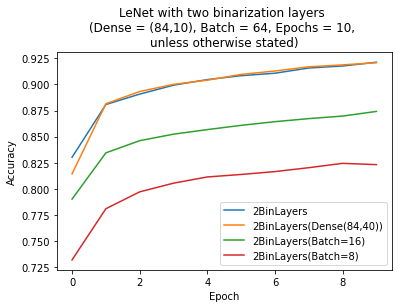

In [ ]:
# Plotting binarized two layers
plt.title('LeNet with two binarization layers \n(Dense = (84,10), Batch = 64, Epochs = 10, \nunless otherwise stated)')
plt.plot(trained_model7.history['accuracy'])
plt.plot(trained_model8.history['accuracy'])
plt.plot(trained_model9.history['accuracy'])
plt.plot(trained_model10.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['2BinLayers', 
            '2BinLayers(Dense(84,40))', 
            '2BinLayers(Batch=16)', 
            '2BinLayers(Batch=8)', 
            ], loc='lower right')
plt.show()

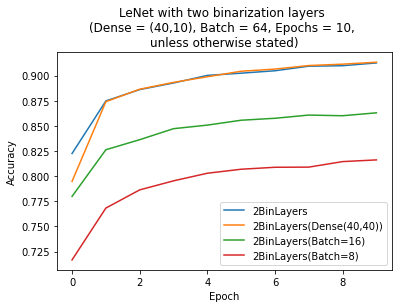

In [ ]:
plt.title('LeNet with two binarization layers \n(Dense = (40,10), Batch = 64, Epochs = 10, \nunless otherwise stated)')
plt.plot(trained_model11.history['accuracy'])
plt.plot(trained_model12.history['accuracy'])
plt.plot(trained_model13.history['accuracy'])
plt.plot(trained_model14.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['2BinLayers', 
            '2BinLayers(Dense(40,40))', 
            '2BinLayers(Batch=16)',
            '2BinLayers(Batch=8)',
            ], loc='lower right')
plt.show()

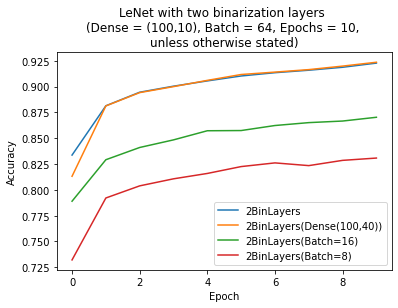

In [ ]:
plt.title('LeNet with two binarization layers \n(Dense = (100,10), Batch = 64, Epochs = 10, \nunless otherwise stated)')
plt.plot(trained_model15.history['accuracy'])
plt.plot(trained_model16.history['accuracy'])
plt.plot(trained_model17.history['accuracy'])
plt.plot(trained_model18.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['2BinLayers', 
            '2BinLayers(Dense(100,40))', 
            '2BinLayers(Batch=16)', 
            '2BinLayers(Batch=8)', 
            ], loc='lower right')
plt.show()



---
**3 layers binarized:**



1. layer size: 120

   batch size: 64

In [ ]:
model19 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(120, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(84, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model19)

model19.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model19 = model19.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss19, test_acc19 = model19.evaluate(test_images, test_labels)

+sequential_19 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_38                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_38                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_39                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_39                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_37                        -         (-1, 784)        0         0       0           0            0 |
| batch_no

2. Layer size: 200

   batch size: 64

In [ ]:
model20 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(200, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(84, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model20)

model20.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model20 = model20.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss20, test_acc20 = model20.evaluate(test_images, test_labels)

+sequential_20 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_40                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_40                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_41                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_41                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_39                        -         (-1, 784)        0         0       0           0            0 |
| batch_no

In [ ]:
model21 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(120, activation=tf.nn.relu),
    #tf.keras.layers.Dense(84, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Flatten(),
    lq.layers.QuantDense(400, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(84, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    lq.layers.QuantDense(10, use_bias=False, **kwargs),
    tf.keras.layers.BatchNormalization(momentum=0.999, scale=False),
    tf.keras.layers.Activation("softmax")
])

lq.models.summary(model21)

model21.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained_model21 = model21.fit(train_images, train_labels, batch_size=64, epochs=10)

test_loss21, test_acc21 = model21.evaluate(test_images, test_labels)

+sequential_22 stats----------------------------------------------------------------------------------------+
| Layer                   Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                               (bit)                        x 1       x 1    (kB)                          |
+-----------------------------------------------------------------------------------------------------------+
| conv2d_44                         -   (-1, 28, 28, 6)        0       156    0.61           0       117600 |
| max_pooling2d_44                  -   (-1, 14, 14, 6)        0         0       0           0            0 |
| conv2d_45                         -  (-1, 14, 14, 16)        0      2416    9.44           0       470400 |
| max_pooling2d_45                  -    (-1, 7, 7, 16)        0         0       0           0            0 |
| flatten_43                        -         (-1, 784)        0         0       0           0            0 |
| batch_no

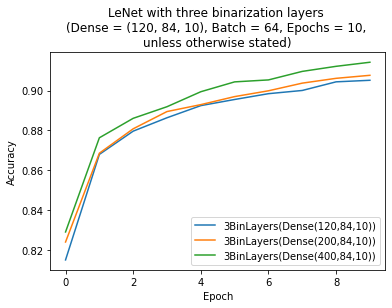

In [ ]:
plt.title('LeNet with three binarization layers \n(Dense = (120, 84, 10), Batch = 64, Epochs = 10, \nunless otherwise stated)')
plt.plot(trained_model19.history['accuracy'])
plt.plot(trained_model20.history['accuracy'])
plt.plot(trained_model21.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['3BinLayers(Dense(120,84,10))', 
            '3BinLayers(Dense(200,84,10))', 
            '3BinLayers(Dense(400,84,10))', 
            ], loc='lower right')
plt.show()

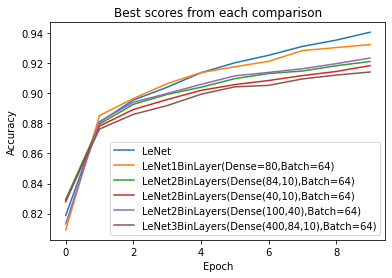

In [ ]:
# best scores
plt.plot(trained_Lmodel.history['accuracy'])
plt.plot(trained_model4.history['accuracy'])
plt.plot(trained_model7.history['accuracy'])
plt.plot(trained_model11.history['accuracy'])
plt.plot(trained_model16.history['accuracy'])
plt.plot(trained_model21.history['accuracy'])
plt.title('Best scores from each comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([
            'LeNet', 
            'LeNet1BinLayer(Dense=80,Batch=64)', 
            'LeNet2BinLayers(Dense(84,10),Batch=64)', 
            'LeNet2BinLayers(Dense(40,10),Batch=64)', 
            'LeNet2BinLayers(Dense(100,40),Batch=64)', 
            'LeNet3BinLayers(Dense(400,84,10),Batch=64)', 
            ], loc='lower right')
plt.show()